***HW2 - Detecting Type 1 Diabetes***

# **Theory Assignment**

Theoretical questions

### Q1: ###
To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

### A1:  ###
Accuracy is the number of correct predictions made by the model by the total number of records.
On the other hand, performance include much more evaluation properties in it such as F1 score, AUC, precision etc.
For us, performance is more important because accuracy can be deceiving if the data is not representive enough. For instance, if we use a binary naive classifier to determine whether a person has cancer or not, and the data is biased in a way that only 5 cases are positive out of 100 patients, we get 95% accuracy. That's pretty high accuracy rate, but of course this model won't do good job for other datasets.

### Q2: ###
T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

### A2: ###

**Using BMI and BP:**
    
*pros:*
- Chances of over-fitting the model are smaller.
- Weights will be easier to find.
- Better performance: The calculations will be simpler and therefore faster.
- Data cleanning will only include two coloumns.

*cons:*
- In case we didn't validate it in advance, we can't be sure that these are the most important features. This can lead to diminished performance and crucial mistakes. 
For example, a false negative case; One may not be treated well which can lead to devastating consequences. That might be caused , for example, in case we chose the most important features, but other features are importamt too.
    
**Using all features:**

*pros*
- The model will most likely perform better and will have better accuracy (under the assumption that our data is reliable enough). This is true in case there is no high correlation that might cause over-fitting.

*cons*
- Data exploration and cleanning will be difficult.
- We'll have a lot of data meanning extended computation time.
    
Regarding all of the above, using all features might lead to over-fitting and cost expensive computatinal time, but on the other hand, it can lead to a more accurate model.

### Q3: ###
A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

### A3: ###

We can assume that the data won't be linearly seperable since the samples look alike and have similar properties.
Thus, we will use SVM with a nonlinear kernel to find the correct boundary line.



### Q4: ###

What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

### A4: ###
Both methods assist us in classifying data that is approximately linearly seperable. However, there are some differences between them.

LR - focuses mainly on maximizing the probability to be labeled in a certain class. the output is suited probabilities without considering the geometric location of the sample.

Linear SVM - in general, this method is about finding a boundary line between the different labels using various kernel functions(can be a circle etc). Linear support vector machine uses a linear kernel function i.e a linear boundary line, or if needed, a hyperplane, depends on the dimensions' number.

Though both classifiers can be useful, SVM relies mostly on the geometrical arrangement of our dataset, yet LR uses the statistical properties of the data.

The main hyperparameter to tune is $\lambda$ (or C in python which is 1/$\lambda$).

In logistic regression, this parameter determines the bias-variance tradeoff. On one hand, for low values of $\lambda$ (or high values of C), our model may be too complex and we risk overfitting our training examples(high variance). In this case the model will memorise, not learn. On the other hand, for high values of $\lambda$ (or low values of C) our model may become too simple and the assigned weights can be misleading in further analysis.

In linear SVM, the parameter regulates the trade-off between maximizing the distance from the hyperplane to the support vectors and minimizing the misclassifications. In this case, the higher C is, the harder we "punish" the model for any misclassification, nevertheless we decrease the hyperplane's distance from the support vectors.

# **Coding Assignment:**

Import and load packages:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import distutils
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Ext_Functions import str_to_bool_series

# **Q1 - Data loading and preprocessing:**

Load data:

In [2]:
df_orig = pd.read_csv('HW2_data.csv')



Transfer all data to binary numeric values:

It is easier to work with numeric values than with strings. And because the strings are different for each column, it is even better to do so. In addition, it is better for the classifiers.

---
*This step was done before we knew about the OneHotVector question (Q4), and therefore it is done in this stage of the script*

---

In [3]:
from Ext_Functions import nan2num

df = df_orig
for column in df.columns:
    df[column] = str_to_bool_series(df_orig[column])

Clean NaN's:

Since the data is not very big, but the NaN's is still a small part of it (but not small in a way we can drop it), we prefer to clean the NaN's in a simple way:
Age nulls will be replaced with the average age.
Other nulls will be replaced with a random value from the same feature (with the probability of the current label's state)

In [4]:
t1d_clean = nan2num(df)

Scale Age column:

Since all data is between 0 and 1, we will scale 'Age', the only non-scaled data, with MinMaxScaler.

In [5]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
t1d_clean[['Age']] = min_max_scaler.fit_transform(t1d_clean[['Age']])

# **Q2 -  Split the data into Test Train 20%**

In [6]:
diagnosis = t1d_clean['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(t1d_clean, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))

# **Q3 - Visualization and exploration of the data**



# Distribution of the features:

In [7]:
from Ext_Functions import print_dist_features
print_dist_features(t1d_clean, X_train, X_test)

Feature            | Train % | Test % | Difference
Age                  0.43     0.43     0.0     
Gender               63.94     62.83     1.11
Increased Urination  48.23     48.67     -0.44
Increased Thirst     44.03     38.05     5.98
Sudden Weight Loss   39.16     45.13     -5.97
Weakness             56.42     60.18     -3.76
Increased Hunger     46.46     43.36     3.1
Genital Thrush       20.58     25.66     -5.08
Visual Blurring      45.8      41.59     4.21
Itching              48.23     44.25     3.98
Irritability         23.01     25.66     -2.65
Delayed Healing      46.9      43.36     3.54
Partial Paresis      42.7      42.48     0.22
Muscle Stiffness     35.62     36.28     -0.66
Hair Loss            34.29     41.59     -7.3
Obesity              17.48     14.16     3.32
Diagnosis            60.62     61.06     -0.44
Family History       50.22     52.21     -1.99


**Section a**

**1.**
Imbalance between train and test sets could cause the learning algorithm to fail in classification of the test set. These situation can cause problem in many aspects: We may choose the wrong model for the data; RandomForest-like models may mark the wrong features as important; PCA-like model may do a bad or even wrond reduction of the dimensionallity.

**2.** 
Balance can be achieved using stratification. Stratification help the train-test-splitting of the data to be more balanced, meaning that the ratio of the feature will be similar in the train set and the test set.

**Section b - relationship between feature and label:**

These plots show the relationship between each feature and label. The age feature is shown in zoom-in plot because it has many details and was not clear in a small plot

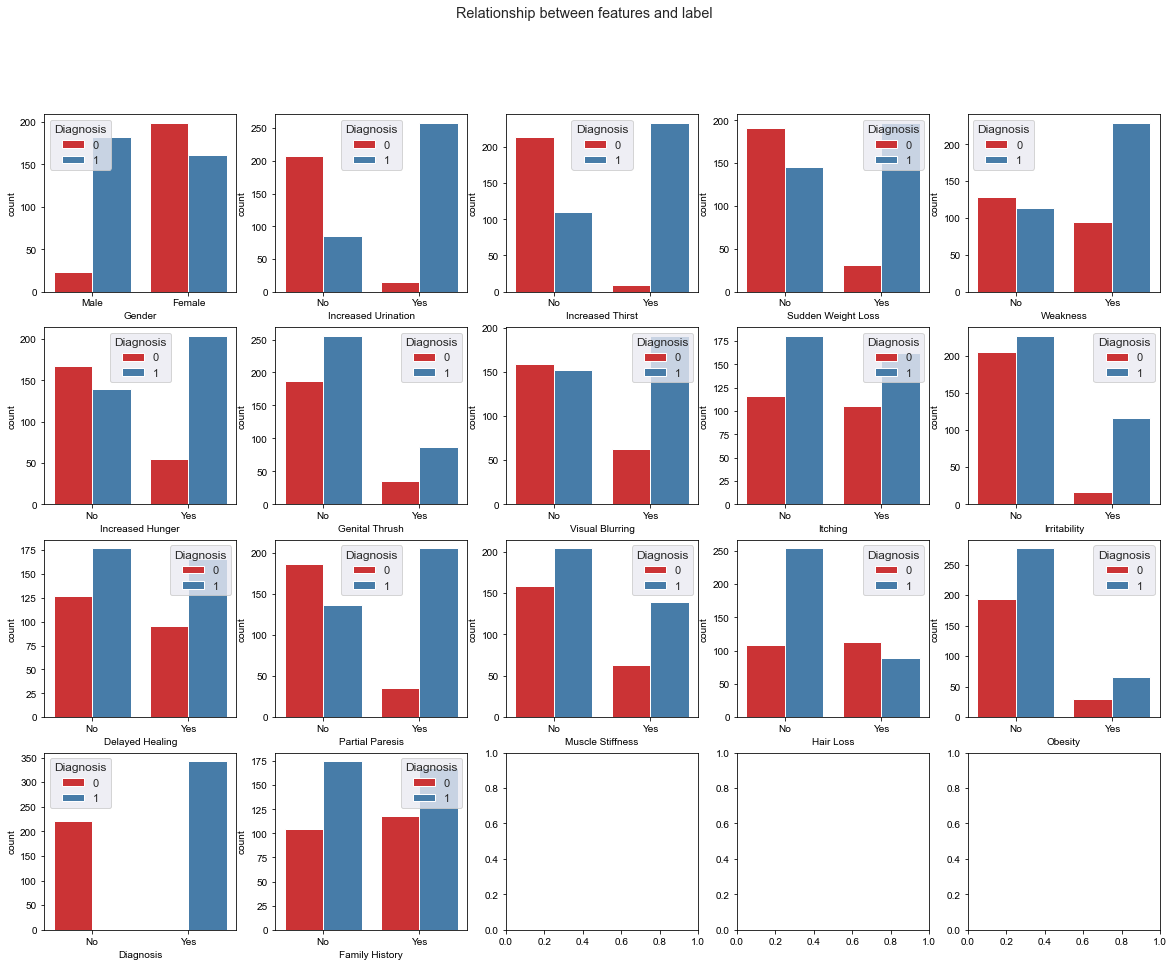

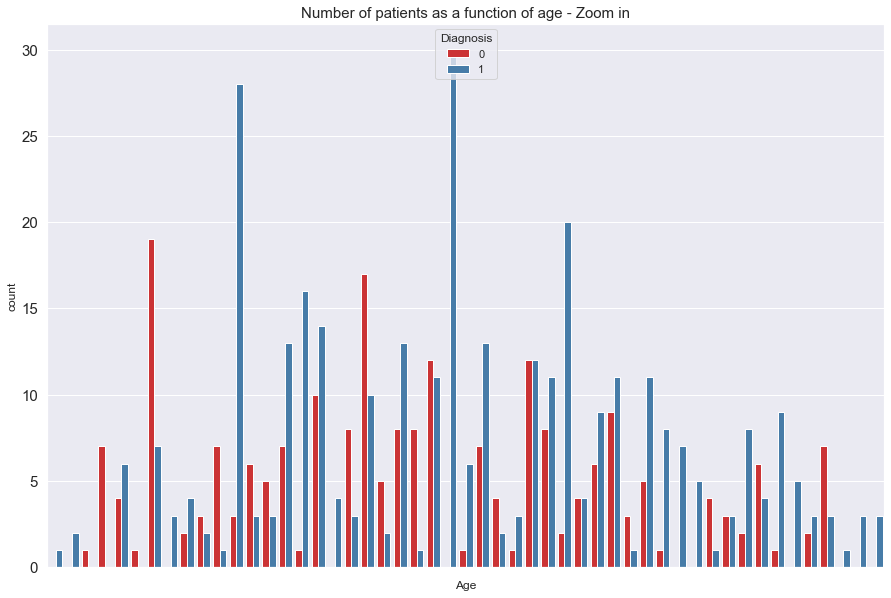

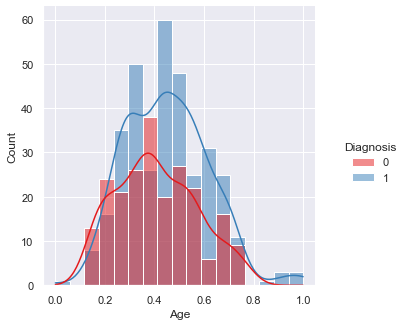

In [8]:
import seaborn as sbn
import matplotlib.ticker as ticker
from Ext_Functions import feature_corr

feature_corr(t1d_clean)

fig, axes = plt.subplots(1, 1,figsize=(15, 10) )


# Plot Age seperately:
title_text = 'Number of patients as a function of age - Zoom in'
feat_lab = sbn.countplot(ax = axes, x='Age', hue = 'Diagnosis', data = t1d_clean)
feat_lab.xaxis.set_major_locator(ticker.LinearLocator(10))
feat_lab.set_title(title_text, fontsize=15)
axes.tick_params(axis='both', which='major', labelsize=15)

sbn.displot(t1d_clean, x="Age" ,hue="Diagnosis", kde=True)
plt.show()

**Section d**

**1.** We were surprised to see that there are much more diagnosed men than women. One could expect that the men's and women's distributions will be similar, yet we see that the ratio between ill and healthy patients is less than 1 at the women's section and way over 1 at the men's section (It is known that female suffer from T1D more than man)
Another thing we noticed is the age-diagnosis correlation. As expected, age was not a big factor and does not has a big impact on the diagnosis (T1D is not an age-related disease (as far as sientists know), it is a Congenital disease.
In relationship to the last paragraph, We were suprised to see that Family History doesn't show much of an impact, considering the fact that T1D is a genetic disease.

**2.** In order to determine which features are important, we have to look for two major properties for each feature:

    1. On the yes label - high number of diagnosed patients (label - 1) compared to the healthy ones.
    
    2. On the no label - the opposite of 1. A high number of healthy patients compared to the sick ones will indicate that this feature is important.

From the graphs above, it seems that the features "increased thirst" ,"increased hunger" and "increased urination" are going to be significant.

#### Additional Plots:

This pie plot is here just to tell us about the diagnosis distribution.

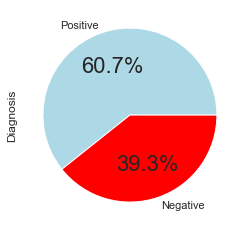

In [9]:
Y = df['Diagnosis']
Y.value_counts().plot(kind="pie", labels=['Positive', 'Negative'], colors = ['LightBlue', 'Red'], autopct='%1.1f%%')
plt.show()

In [10]:
X_train = X_train.drop(columns=['Diagnosis'])
X_test = X_test.drop(columns=['Diagnosis'])

# **Q4 - One Hot Vector**

**We have already done this step - manually - in the data pre-processing stage**

In [11]:
X_train_ohv = X_train
X_test_ohv = X_test
y_train_ohv = y_train
y_test_ohv = y_test

# **Q5 - 5Kfold**

**Section a**

We shall use the logistic regression model as the linear one and the support vector machine model with a nonlinear kernel as the nonlinear one. 

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [13]:
from Ext_Functions import cv_kfold
from Ext_Functions import pred_log

#### **Test and Fit the models**

**Training, testing and choosing the best Logistic Regression model:**

*We added some more evaluation metrics just in case there will be tie between two different models in the AUC frield*

In [14]:
C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict = cv_kfold(X_train_ohv, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict))

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.674228  0.007296  0.500000  0.611111
1     0.01      l2  0.478486  0.012761  0.976768  0.923077
2     0.10      l1  0.302202  0.039525  0.987121  0.934066
3     0.10      l2  0.284936  0.025394  0.986111  0.934066
4     1.00      l1  0.196576  0.043501  0.989969  0.956044
5     1.00      l2  0.202546  0.031876  0.988683  0.956044
6     5.00      l1  0.198589  0.042287  0.989712  0.956044
7     5.00      l2  0.194639  0.036989  0.988169  0.956044
8    10.00      l1  0.201201  0.042084  0.990226  0.956044
9    10.00      l2  0.196779  0.038868  0.988683  0.956044
10  100.00      l1  0.205537  0.042548  0.990226  0.956044
11  100.00      l2  0.204260  0.042021  0.989712  0.956044


Using K cross fold validation (as requested :)) help us decide which hyper-parameter will lead us to the best model.

We'll seek the best parameters according to AUC.

The chosen parameters are as follows:
**(The results were changed sometimes when we re-ran the Kernel. We chose the parameters according to the results we had when these lines where written)**

In [15]:
c = 10
p = 'l1'
lr_best_model = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv)
y_pred_p_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv, flag=True)

**Testing of the best non-linear SVM model was done using GridSearchCV with different parameters.**

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model = SVC(probability=True)
C = np.array([1, 100, 1000])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                        'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear.fit(X_train_ohv, y_train_ohv)

best_svm_nonlin = svm_nonlinear.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear.best_params_)

Parameters to get best svm are: {'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


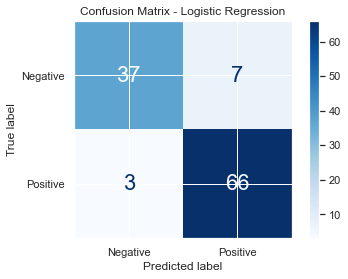

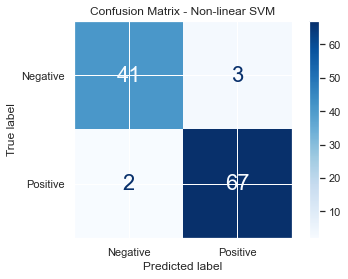

In [17]:
from sklearn.metrics import plot_confusion_matrix


disp_lr = plot_confusion_matrix(lr_best_model, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_lr.ax_.set_title("Confusion Matrix - Logistic Regression")

disp_svm = plot_confusion_matrix(best_svm_nonlin, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_svm.ax_.set_title("Confusion Matrix - Non-linear SVM")

plt.show()

**Section b**

Plot and compare all algorithms:

We decided to test both test results and train results. Train results can help us determine whether there was an over-fitting of the model.

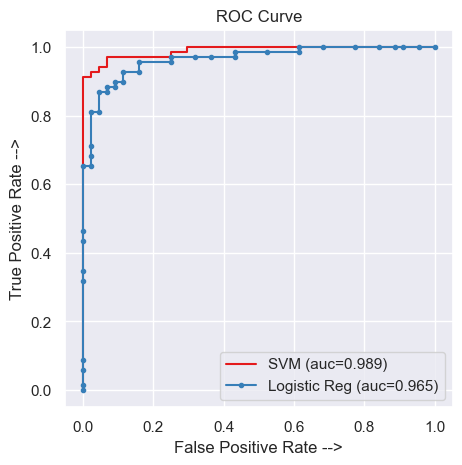

Logistic Regression Results:
Test set results:
Accuracy is: 91.15%
F1 score is: 90.53%
AUC is: 96.48%

Train set results:
Accuracy is: 93.81%
F1 score is: 93.53%
AUC is: 98.30%

SVM Results:
Test set results:
Accuracy is: 95.58%
F1 score is: 95.33%
AUC is: 98.91%

Train set results:
Accuracy is: 99.56%
F1 score is: 99.54%
AUC is: 100.00%


In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from Ext_Functions import parameter_evaluation
from Ext_Functions import lr_svm_model_comparison

# lr = Logistic Regression
# svm = Support Vector Machine

lr_svm_model_comparison(lr_best_model, best_svm_nonlin, X_train_ohv, X_test_ohv, y_train_ohv, y_test_ohv)


**Section c**

For this dataset,judging by the AUCROC score, the SVM model performed better.
Considering all of the results above, non-linear model is more appropriate than linear model for this data.

The AUC of the Train set is 100%, which made us think that it is may be over-fitted (or that we had a bug which we couldn't find). But the other parameters (both in test set) made us calm because it performed better than LR in all of them (including specificity, precision, recall etc. which we drop in the final-assignment results)

# **Q6 - Feature importance**

Feature: 0, Score: 0.09066
Feature: 1, Score: 0.10024
Feature: 2, Score: 0.21899
Feature: 3, Score: 0.18787
Feature: 4, Score: 0.05586
Feature: 5, Score: 0.01954
Feature: 6, Score: 0.03172
Feature: 7, Score: 0.01715
Feature: 8, Score: 0.02928
Feature: 9, Score: 0.03118
Feature: 10, Score: 0.03645
Feature: 11, Score: 0.03359
Feature: 12, Score: 0.06063
Feature: 13, Score: 0.01911
Feature: 14, Score: 0.03905
Feature: 15, Score: 0.01930
Feature: 16, Score: 0.00939


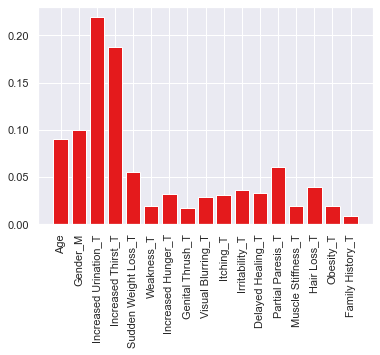

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
labels = ['Age','Gender_M', 'Increased Urination_T', 'Increased Thirst_T',
       'Sudden Weight Loss_T', 'Weakness_T',
        'Increased Hunger_T','Genital Thrush_T', 'Visual Blurring_T',  
        'Itching_T', 'Irritability_T','Delayed Healing_T',
        'Partial Paresis_T', 'Muscle Stiffness_T', 'Hair Loss_T',
        'Obesity_T','Family History_T']
t= np.arange(0,17)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(t,labels, rotation='vertical')
plt.show()

**Section a, 1+2**

As we can see, the 2 most important features are increased urination and increased thirst.

This matches up with the feature - label correlation from Q3. Looking at the graphs, we can see that these features are the most meaningful ones since they have the largest number of diagnosed patients. Also, among the patients who do have increased urination\thirst, the number of the healthy ones is the lowest in comparison to the diagnsed ones.

# Q7 - Data Separability Visualization

**Section a**

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_components = 2
pca = PCA(n_components=n_components, whiten=True)
scaler = StandardScaler()
X_train_copy = scaler.fit_transform(X_train_ohv)
X_test_copy = scaler.transform(X_test_ohv)
X_train_pca = pca.fit_transform(X_train_copy)
X_test_pca = pca.transform(X_test_copy)

In [22]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

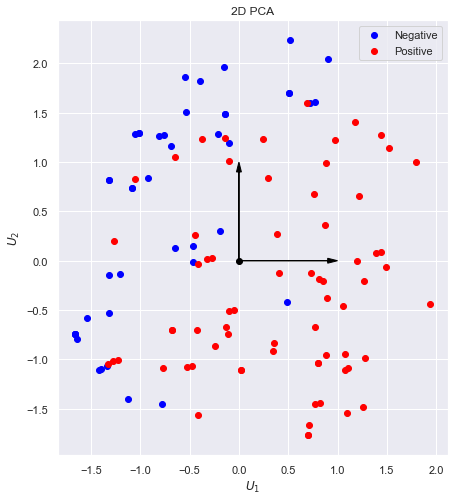

In [23]:
plt_2d_pca(X_test_pca,y_test)

**Section b**

As can be seen above, the data is not linearly seperable. It is possible to use a linear classifier, however the boundary condition may be misleading. In conclusion, it is better to use a non-linear model for this task.

**Section c**

In [24]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix

Finding the best parameters for the new-2D-data:

**Training, testing and choosing the best Logistic Regression model:**

In [25]:
#Logistic Regression:

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict_pca = cv_kfold(X_train_pca, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict_pca))

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.641527  0.013210  0.935354  0.611111
1     0.01      l2  0.479428  0.007852  0.957305  0.901099
2     0.10      l1  0.324939  0.019256  0.957305  0.890110
3     0.10      l2  0.337784  0.017467  0.959362  0.890110
4     1.00      l1  0.304782  0.030019  0.959877  0.890110
5     1.00      l2  0.305558  0.027665  0.959877  0.890110
6     5.00      l1  0.304732  0.032138  0.959362  0.890110
7     5.00      l2  0.304579  0.031371  0.959362  0.890110
8    10.00      l1  0.304747  0.032418  0.959362  0.890110
9    10.00      l2  0.304647  0.032018  0.959362  0.890110
10  100.00      l1  0.304790  0.032677  0.959362  0.890110
11  100.00      l2  0.304782  0.032635  0.959362  0.890110


Now, we choose the best parameters (best AUC)

*(Basically, we are doing the same as we done in Q5, but with other models and other data.)*

In [26]:
c = 1
p = 'l2'
lr_best_model_pca = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best_pca, _ = pred_log(lr_best_model_pca, X_train_pca, y_train_ohv, X_test_pca)
y_pred_prob_best_pca, _ = pred_log(lr_best_model_pca, X_train_pca, y_train_ohv, X_test_pca, flag=True)

**Training, testing and choosing the best SVM non-linear model:**

In [27]:
n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model = SVC(probability=True)
C = np.array([0.1, 1, 10, 100, 1000])
degree = np.array([1, 2, 3, 4, 5])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear_pca = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'], 
                        'svm__degree': degree, 'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear_pca.fit(X_train_pca, y_train_ohv)

best_svm_nonlin_pca = svm_nonlinear_pca.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear_pca.best_params_)

Parameters to get best svm are: {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}


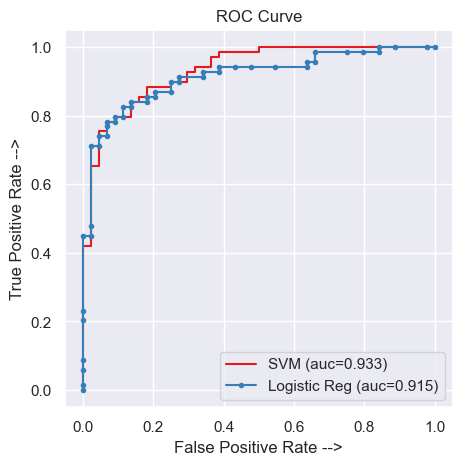

Logistic Regression Results:
Test set results:
Accuracy is: 83.19%
F1 score is: 82.52%
AUC is: 91.53%

Train set results:
Accuracy is: 86.06%
F1 score is: 85.60%
AUC is: 93.90%

SVM Results:
Test set results:
Accuracy is: 83.19%
F1 score is: 82.09%
AUC is: 93.31%

Train set results:
Accuracy is: 88.50%
F1 score is: 87.62%
AUC is: 96.44%


In [28]:
#Predict + fit for LR and SVM (PCA):

lr_best_model_pca.fit(X_train_pca, y_train)
y_pred_test_pca = lr_best_model_pca.predict(X_test_pca)

model_lr_pca = lr_best_model_pca
model_svm_pca = best_svm_nonlin_pca


lr_svm_model_comparison(model_lr_pca, model_svm_pca, X_train_pca, X_test_pca, y_train_ohv, y_test_ohv)



**Section d:**

In [30]:
feat_name =['Increased Urination','Increased Thirst']
X_train_2f = X_train[feat_name]
X_test_2f =  X_test[feat_name]

Again - finding the best parameters for the new data:

In [31]:
#Logistic Regression:

X_train_2f = pd.DataFrame(X_train_2f)
X_test_2f = pd.DataFrame(X_test_2f)

C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict_2f = cv_kfold(X_train_2f, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict_2f))

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.676358  0.007378  0.500000  0.611111
1     0.01      l2  0.547341  0.010403  0.963636  0.611111
2     0.10      l1  0.352955  0.046531  0.959091  0.934066
3     0.10      l2  0.375576  0.039223  0.963636  0.934066
4     1.00      l1  0.328867  0.064403  0.959091  0.934066
5     1.00      l2  0.330039  0.060470  0.959091  0.934066
6     5.00      l1  0.328897  0.066504  0.959091  0.934066
7     5.00      l2  0.328638  0.065454  0.959091  0.934066
8    10.00      l1  0.328952  0.066764  0.959091  0.934066
9    10.00      l2  0.328763  0.066233  0.959091  0.934066
10  100.00      l1  0.329014  0.067022  0.959091  0.934066
11  100.00      l2  0.328990  0.066960  0.959091  0.934066


Same as before, we chose the best parameters according to AUC:

*(Again, it might be different in different runs of the script)*

In [32]:
c = 0.01
pen = 'l2'
lr_best_model_2f = LogisticRegression(solver='saga', multi_class='ovr', penalty=pen, C=c, max_iter=10000, random_state=10)
y_pred_best_2f, _ = pred_log(lr_best_model_2f, X_train_2f, y_train_ohv, X_test_2f)
y_pred_prob_best_2f, _ = pred_log(lr_best_model_2f, X_train_2f, y_train_ohv, X_test_pca, flag=True)

**Training, testing and choosing the best SVM non-linear model:**

In [33]:
n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model_2f = SVC(probability=True)
C = np.array([0.1, 1, 10, 100, 1000])
degree = np.array([1, 2, 3, 4, 5])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear_2f = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'], 
                        'svm__degree': degree, 'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear_2f.fit(X_train_2f, y_train_ohv)

best_svm_nonlin_2f = svm_nonlinear_2f.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear_2f.best_params_)

Parameters to get best svm are: {'svm__C': 1.0, 'svm__degree': 5, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}


**Evaluation for LR and SVM models for 2 features only data:**

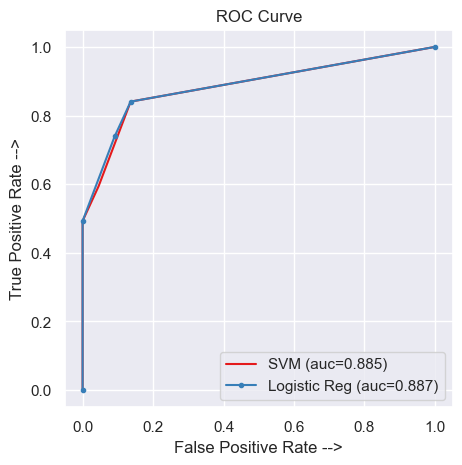

Logistic Regression Results:
Test set results:
Accuracy is: 84.96%
F1 score is: 84.47%
AUC is: 88.67%

Train set results:
Accuracy is: 87.39%
F1 score is: 87.03%
AUC is: 90.85%

SVM Results:
Test set results:
Accuracy is: 84.96%
F1 score is: 84.47%
AUC is: 88.47%

Train set results:
Accuracy is: 87.39%
F1 score is: 87.03%
AUC is: 90.86%


In [34]:
lr_svm_model_comparison(lr_best_model_2f, best_svm_nonlin_2f, X_train_2f, X_test_2f, y_train_ohv, y_test_ohv)

We can see that for two features, we got very similar - if not equal - results.

It is possible that when we use two features, our data becomes linearly seperable, so even if we try to classify it with a nonlinear classifier, there will be no big difference. 

**Section e**

As we can see from the graphs above, PCA performed better - it had larger AUC.

This is as expected, since PCA finds 2 axes that are the best combination of all the features, as opposed to just using the two best features. In other words, when PCA choose 2 dimension, it doesn't choose only 2 features, but in each dimension there are many feature involved.

However, there is a problem applying PCA over our data. PCA's principles are to transfer the origin to the mean of the data and then find the axe with maximized variance. 
In this case, the data is binary, so mean and variance are meaningless. 

But even though PCA is not very reliable considering the type of our data as said in the last paragraph, we can see that it performed much better than the 2-featured model.

# THE (very-happy-and-exciting) END #